### Get the Data

##### Download the Data

In [36]:
import os
import tarfile
import urllib.request
import pandas as pd

titanic = pd.read_csv("dataset/test.csv")

##### Take a Quick Look At The Data Structure

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [38]:
titanic.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


<Axes: >

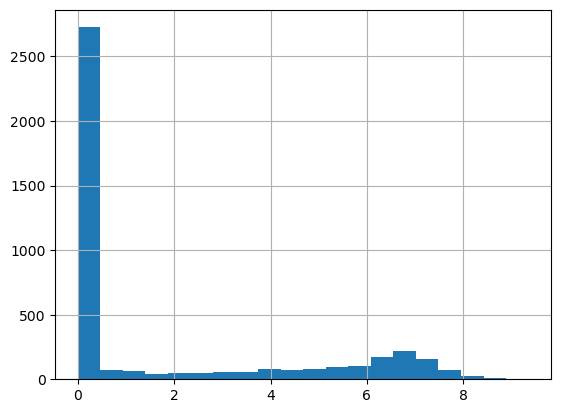

In [39]:
import numpy as np

# Apply log transformation to the data
titanic["RoomService_log"] = np.log1p(titanic["RoomService"])

# Create a histogram with the transformed data
titanic["RoomService_log"].hist(bins=20)


In [40]:
# titanic["Transported"] = titanic["Transported"].astype(int)
# titanic_num = titanic.select_dtypes(include="number")
# corr_matrix = titanic_num.corr()
# corr_matrix["Transported"].sort_values(ascending=False)

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      4277 non-null   object 
 1   HomePlanet       4190 non-null   object 
 2   CryoSleep        4184 non-null   object 
 3   Cabin            4177 non-null   object 
 4   Destination      4185 non-null   object 
 5   Age              4186 non-null   float64
 6   VIP              4184 non-null   object 
 7   RoomService      4195 non-null   float64
 8   FoodCourt        4171 non-null   float64
 9   ShoppingMall     4179 non-null   float64
 10  Spa              4176 non-null   float64
 11  VRDeck           4197 non-null   float64
 12  Name             4183 non-null   object 
 13  RoomService_log  4195 non-null   float64
dtypes: float64(7), object(7)
memory usage: 467.9+ KB


### Experimenting with Attribute Combinations


In [42]:
titanic["TotalSpent"] = titanic["RoomService"]+ titanic["FoodCourt"]+ titanic["ShoppingMall"]+ titanic["Spa"]+ titanic["VRDeck"]
# titanic = titanic.dropna()
titanic["PassengerGroup"] = titanic["PassengerId"].str.split("_", n=1).str[0]
titanic["CabinDeck"] = titanic["Cabin"].str.split("/").str[0]
titanic["CabinNum"] = titanic["Cabin"].str.split("/").str[1]
titanic["CabinSide"] = titanic["Cabin"].str.split("/").str[2]
# titanic["Transported"] = titanic["Transported"].astype("Int64")
titanic["CryoSleep"] = titanic["CryoSleep"].astype("Int64")
titanic["VIP"] = titanic["VIP"].astype("Int64")

titanic_num = titanic.select_dtypes(include=[np.number])
corr_matrix = titanic_num.corr()
# # corr_matrix["Transported"].sort_values(ascending=False)

### Data Cleaning

In [43]:
sample_incomplete_rows = titanic[titanic.isnull().any(axis=1)].head()

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

imputer.fit(titanic_num)
imputer.statistics_
X = imputer.transform(titanic_num)

titanic_tr = pd.DataFrame(X, columns=titanic_num.columns,
                          index=titanic.index)

### Handling Text and Categorical Attributes


In [44]:
titanic_cat = titanic.select_dtypes(exclude=[np.number])
titanic_cat = titanic_cat.drop(["Name", "PassengerGroup", "PassengerId", "CabinNum", "Cabin"], axis=1)

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)
# titanic_cat_df = pd.DataFrame(columns = [cat_encoder.get_feature_names_out()])
titanic_cat_df = pd.DataFrame(titanic_cat_1hot.toarray(), columns = [cat_encoder.get_feature_names_out()])
titanic_cat_df = titanic_cat_df.drop(["HomePlanet_nan", "Destination_nan", "CabinDeck_nan", "CabinSide_nan"], axis=1)

/tmp/ipykernel_120521/2351006700.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  titanic_cat_df = titanic_cat_df.drop(["HomePlanet_nan", "Destination_nan", "CabinDeck_nan", "CabinSide_nan"], axis=1)


### Custom Transformers


nao conxegui

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

roomservice_ix, foodcourt_ix, shoppingmall_ix, spa_ix, vrdeck_ix = [titanic_tr.columns.get_loc(c) for c in col_names]


class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_expenses=True):
        self.add_expenses = add_expenses

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.add_expenses:
            TotalSpent = (
                X[:, roomservice_ix]
                + X[:, foodcourt_ix]
                + X[:, shoppingmall_ix]
                + X[:, spa_ix]
                + X[:, vrdeck_ix]
            )
            return np.c_[X, TotalSpent]
        return X

attr_adder = CombinedAttributesAdder(add_expenses=True)
attr_adder.fit(titanic_tr)
new_attr_df = attr_adder.transform(titanic_tr)

InvalidIndexError: (slice(None, None, None), 3)

### Putting it all together

In [47]:
titanic_processed = titanic_num.merge(titanic_cat_df, left_index=True, right_index=True).reset_index(drop=True)

In [48]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
titanic_processed.columns = titanic_processed.columns.astype(str)
titanic_processed_tr = imp_mean.fit_transform(titanic_processed)

titanic_processed = pd.DataFrame(titanic_processed_tr, columns = titanic_processed.columns, index = titanic_processed.index)

In [49]:
titanic_processed.to_csv("dataset/test_processed.csv", index=False)